<a href="https://colab.research.google.com/github/Charly5853/Matrix_01_09_2024/blob/main/3ML_Car_Test_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Packet and Libraries


Step 1: Install tensorflow


In [ ]:
!pip install tensorflow==2.12.0


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

Install tensorflow

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

Step 2: Load the Data from the CSV file as provided

In [1]:
import numpy as np
import pandas as pd
import math
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import clear_output
import glob

# Define column names
feature_names = ['symboling', 'normalized-losses', 'make', 'fuel-type',
                 'aspiration', 'num-doors', 'body-style', 'drive-wheels',
                 'engine-location', 'wheel-base', 'length', 'width', 'height',
                 'weight', 'engine-type', 'num-cylinders', 'engine-size',
                 'fuel-system', 'bore', 'stroke', 'compression-ratio',
                 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


# Define the file path pattern
file_path_pattern = 'cars_data.csv'

# Load data, you are already loading data here,
# the code below will overwrite this dataframe
car_data = pd.read_csv(
    'https://storage.googleapis.com/mledu-datasets/cars_data.csv',
    sep=',', names=feature_names, header=None, encoding='latin-1'
)

# 1) translate file.csv to Panda dataframe + df
# Check if the file exists
import os
if os.path.exists(file_path_pattern):
    # Use glob to get all file paths that match the pattern if it exists
    csv_files = glob.glob(file_path_pattern)

    # Load each CSV file into a DataFrame and store in a list
    data_Llist2 = [pd.read_csv(file) for file in csv_files]

    # Print each DataFrame
    df = pd.DataFrame(data_Llist2) # This line is problematic, will create a dataframe of dataframes
else:
    # Assign car_data to df if local file not found
    df = car_data # Assign the originally loaded data to df

# print  Iterate over each column and print its values
for column in df.columns:
    print(f"Values in '{column}' column:")
    print(df[column].values)
    print(" ")
    # Iterate over each column and print its values

print(" ###############################################  ")
clear_output(wait=True)
# 2 Check if any column contains missing values
missing_columns = df.isnull().any()
# Print columns with missing values
print("Columns with missing values:")
print(missing_columns[missing_columns == True].index.tolist())

# print  Iterate over each column and print its values
for column in df.columns:
    print(f"Values in '{column}' column:")
    print(df[column].values)
    # Iterate over each column and print its values
# Select only numeric columns


print(" ========================================")
print('data types of each column')
print(df.dtypes)
print(' Print general information about the DataFrame ')
df.info()

print("????????????????????????????????????????????")
# 3  In each column, it is checked if there are empty values and put NaN.
print("Replace '?' with nan")
# Replace '?' with NaN
df = df.replace('?', np.nan)

print(df.dtypes)
# Iterate over each column and print its values
for column in df.columns:
    print(f"Values in '{column}' column:")
    print(df[column].values)
    print(" ")
    # Iterate over each column and print its values

print(" ###############################################  ")
print('Replace the nan value with the most frequent data')
# Find the most frequent value for each column
most_frequent_values = df.mode().iloc[0]

# Fill NaN values with the most frequent value
df.fillna(most_frequent_values, inplace=True)
# Iterate over each column and print its values
for column in df.columns:
    print(f"Values in '{column}' column:")
    print(df[column].values)
    print(" ")
    # Iterate over each column and print its values

print(" @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ ")
# 5 Convert object wit numeric information to numeric format
print("Convert object wit numeric information to numeric format")
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].apply(pd.to_numeric, errors='coerce')

print(df.dtypes)

print("///////////////////////////////////////////////////")
# 6 Convert int64 , to float64
print("Convert object type columns to float64")
df[['symboling', 'normalized-losses', 'weight', 'engine-size', 'horsepower','peak-rpm',  'city-mpg',  'highway-mpg', 'price'  ]] = df[['symboling', 'normalized-losses', 'weight', 'engine-size', 'horsepower','peak-rpm',  'city-mpg',  'highway-mpg', 'price' ]].astype('float64')
# Print the data types after conversion
print("\nData types after conversion to float64:")
print(df.dtypes)
print('')

# Iterate over each column and print its values
for column in df.columns:
    print(f"Values in '{column}' column:")
    print(df[column].values)
    print(" ")
    # Iterate over each column and print its values

print(" **************************************************  ")
# 7  conver categorical value objetc (with number information) to numeric float64
print(" conver categorical value objetc (with number information) to numeric float64 ")
# Map 'two' to 2.0 and 'four' to 4.0 ...................
door_mapping = {'two' : 2.0, 'four' : 4.0, 'six' : 5.0, 'eight' : 8.0, 'ten' : 10.0,'twelve' : 12.0}
# Convert 'num-doors' column
df['num-doors'] = df['num-doors'].map(door_mapping)
# Convert the column to float64 explicitly
df['num-doors'] = df['num-doors'].astype('float64')

# Map 'two' to 2.0 ,   three = 3 'four' to 4.0 ......
num_cylinders_mapping = {'two' : 2.0, 'three' : 3.0, 'four' : 4.0, 'five' : 5.0, 'six' : 6.0, 'seven' : 7.0, 'eight' : 8.0, 'nine' : 9.0,
'ten' : 10.0,'eleven' : 11.0,'twelve' : 12.0}
# Convert 'num-doors' column
df['num-cylinders'] = df['num-cylinders'].map(num_cylinders_mapping)
# Convert the column to float64 explicitly
df['num-doors'] = df['num-doors'].astype('float64')
print(df.dtypes)
print('')
# Iterate over each column and print its values
for column in df.columns:
    print(f"Values in '{column}' column:")
    print(df[column].values)
    print(" ")
    # Iterate over each column and print its values

print(" @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@  ")
# 8 convet categorial value to numeric(int) and numeric value to float64
# Convert multiple categorical columns to numerical using pd.factorize()
for col in ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']:
    df[col] = pd.factorize(df[col])[0]

print(df.dtypes)
print('')
# Iterate over each column and print its values
for column in df.columns:
    print(f"Values in '{column}' column:")
    print(df[column].values)
    print(" ")
    # Iterate over each column and print its values

# 9 Convert int64 , to float64
print("Convert int64 to float64")
df[['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system' ]] = df[['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']].astype('float64')
# Print the data types after conversion from int64 to float64
print("\nData types after conversion from int64 to float64:")
print(df.dtypes)
print('')


Columns with missing values:
[]
Values in 'symboling' column:
[ 3  3  1  2  2  2  1  1  1  0  2  0  0  0  1  0  0  0  2  1  0  1  1  1
  1  1  1  1 -1  3  2  2  1  1  1  0  0  0  0  0  0  0  1  0  1  0  2  0
  0  0  1  1  1  1  1  3  3  3  3  1  0  1  0  0  0  0  0 -1 -1  0 -1 -1
  3  0  1  1  2  2  2  1  3  3  3  3  3  1  1  1 -1  1  1  1  1  1  1  1
  1  1  2  0  0  0  0  0  3  3  1  0  0  0  0  0  0  0  0  0  0  0  1  1
  1  1  1 -1  3  3  3  3  3  1  0  2  3  2  3  2  3  2  2  2  2  0  0  0
  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  1  1  1  1  2
  2  2  2  2  2 -1 -1 -1 -1 -1  3  3 -1 -1  2  2  2  2  2  2  2  3  3  0
  0  0 -2 -1 -2 -1 -2 -1 -1 -1 -1 -1 -1]
Values in 'normalized-losses' column:
['?' '?' '?' '164' '164' '?' '158' '?' '158' '?' '192' '192' '188' '188'
 '?' '?' '?' '?' '121' '98' '81' '118' '118' '118' '148' '148' '148' '148'
 '110' '145' '137' '137' '101' '101' '101' '110' '78' '106' '106' '85'
 '85' '85' '107' '?' '?' '?' '?' '145' '?' '?' '104' '10

Step 3: Preprocess: clean the data, any missing values and get target values price.

In [4]:
# Separate features (X) and target (y)
X = df.drop("price", axis=1) # Use .drop() to remove the "price" column
y = df["price"]

# ----> Identify and handle non-numeric values in all columns <----
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

# Instead of dropping all rows with NaN, replace them with the mean of the column
# This preserves the data points while handling missing values
for column in X.columns:
    X[column] = X[column].fillna(X[column].mean())

# Now, y needs to be re-indexed to match X after imputation,
# since we didn't drop any rows from X
y = y.reindex(X.index)

# Normalize features to improve model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Step 4: Split Data into Training and Testing Sets

In [5]:
from sklearn.model_selection import train_test_split
# To evaluate  use an 80-20 train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Build a Linear Regression Model, with Keras module


In [8]:
#!pip install tensorflow keras
!pip install tensorflow


In [10]:

# Import required modules
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))  # Adjust input shape based on your data
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Model defined and compiled successfully.")


Model defined and compiled successfully.


Step 6: Train the Model,
using the training data.

In [12]:
import pandas as pd  # Import pandas

#1 ++++++++++++++++++++++++++
# Check for non-numeric columns in X_train
# Convert X_train to a Pandas DataFrame if it's not already
X_train = pd.DataFrame(X_train)  # Convert to DataFrame

print(X_train.dtypes)  # Use dtypes to check data types

# Check if there are any non-numeric values in y_train
print(y_train.dtype)

# -----------------------------------
# 2: Convert Non-Numeric Columns to Numeric
# Convert categorical columns to numeric using pd.get_dummies()
# Replace 'categorical_column' with the actual name of your categorical column(s)
for column in X_train.select_dtypes(include=['object']).columns:
    X_train = pd.get_dummies(X_train, columns=[column], prefix=[column], dummy_na=False)

# -----------------------------------
# 3 3: Handle Missing Values
# Ensure there are no missing values, as they may cause the data type to remain as object rather than numeric.
# Fill any missing values if present
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)

# ------------------------------------
# Step 4: Confirm Data Types and Train
# Ensure all values in X_train and y_train are of type float32
X_train = X_train.astype(np.float32)

# Replace or remove non-numeric values in y_train
# Replace '?' with NaN, then convert to numeric, filling NaNs with 0
y_train = pd.to_numeric(y_train.replace('?', np.nan), errors='coerce').fillna(0)

# Convert y_train to float32
y_train = y_train.astype(np.float32)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

print("\n")
print(" History  ",history.history)




0     float32
1     float32
2     float32
3     float32
4     float32
5     float32
6     float32
7     float32
8     float32
9     float32
10    float32
11    float32
12    float32
13    float32
14    float32
15    float32
16    float32
17    float32
18    float32
19    float32
20    float32
21    float32
22    float32
23    float32
24    float32
dtype: object
float32
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 203032064.0000 - mae: 12688.1670 - val_loss: 293475680.0000 - val_mae: 14538.8799
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 178191136.0000 - mae: 11951.5732 - val_loss: 293473504.0000 - val_mae: 14538.8486
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 215837008.0000 - mae: 12733.1543 - val_loss: 293470816.0000 - val_mae: 14538.8145
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 206045104.0000 - mae: 12761.9854 - val_loss: 293468320.0000 - val_mae: 14538.7812
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 204772096.

Step 7: Evaluate the Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 262748080.0000 - mae: 13479.4277 
Test MAE: 13494.4208984375
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


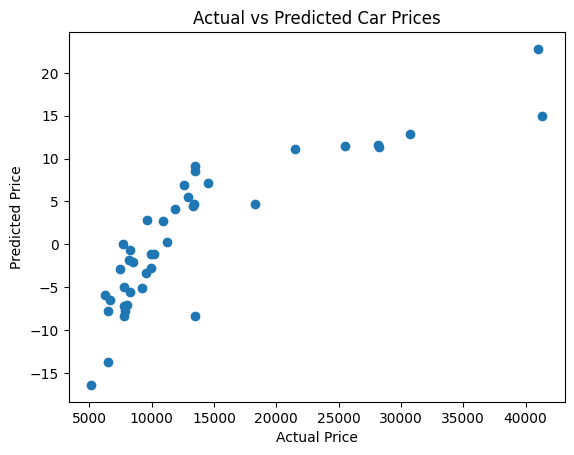

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 262748080.0000 - mae: 13479.4277 
Test MAE: 13494.4208984375
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
      Actual  Predicted
15   30760.0  12.853218
9    13499.0   9.073066
100   9549.0  -3.301288
132  11850.0   4.125825
68   28248.0  11.384904


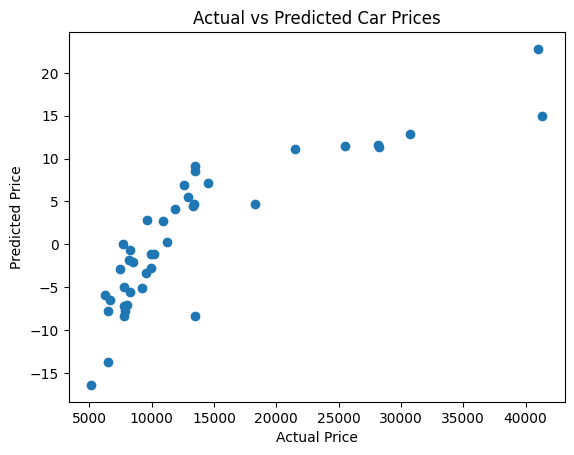

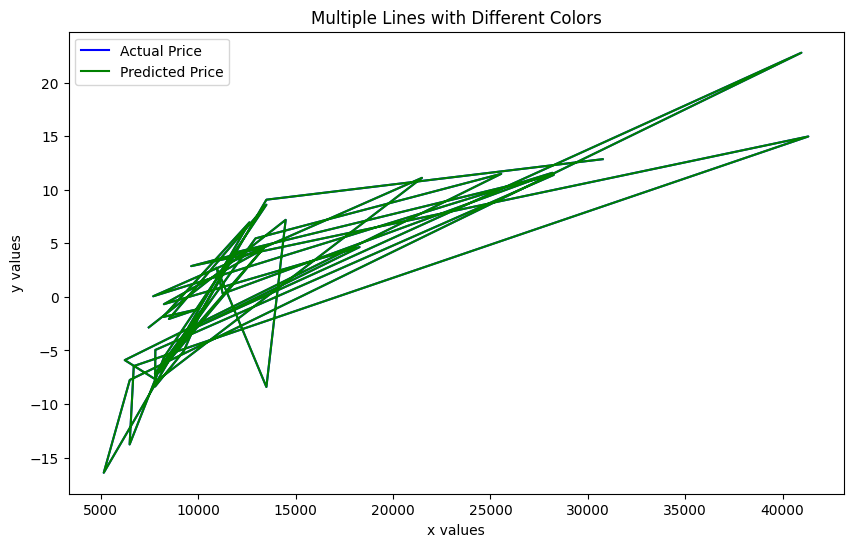

In [13]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np

# Assuming X_test is a NumPy array, convert it to a Pandas DataFrame
X_test = pd.DataFrame(X_test)

# 1. Check for and handle non-numeric columns in X_test
# Convert categorical columns to numeric using pd.get_dummies()
for column in X_test.select_dtypes(include=['object']).columns:
    X_test = pd.get_dummies(X_test, columns=[column], prefix=[column], dummy_na=False)

# 2. Handle Missing Values in X_test
X_test = X_test.fillna(0)  # Fill missing values with 0 or an appropriate value

# 3. Ensure all values in X_test are of type float32
X_test = X_test.astype(np.float32)

# 4. (Optional) Check and handle data types in y_test (if needed)
# If y_test also contains non-numeric values, apply similar data type
# conversion and missing value handling techniques as for X_test

# Convert y_test to numeric if it's not already
# This will assume that '?' represents missing values and will replace them with NaN,
# then convert the column to numeric and fill any remaining NaNs with 0
y_test = pd.to_numeric(y_test.replace('?', np.nan), errors='coerce').fillna(0)
y_test = y_test.astype(np.float32)  # Ensure y_test is float32

# Now, evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")

# Predictions
y_pred = model.predict(X_test)

# Compare predictions to actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Assuming X_test is a NumPy array, convert it to a Pandas DataFrame
X_test = pd.DataFrame(X_test)

# 1. Check for and handle non-numeric columns in X_test
# Convert categorical columns to numeric using pd.get_dummies()
for column in X_test.select_dtypes(include=['object']).columns:
    X_test = pd.get_dummies(X_test, columns=[column], prefix=[column], dummy_na=False)

# 2. Handle Missing Values in X_test
X_test = X_test.fillna(0)  # Fill missing values with 0 or an appropriate value

# 3. Ensure all values in X_test are of type float32
X_test = X_test.astype(np.float32)

# 4. (Optional) Check and handle data types in y_test (if needed)
# If y_test also contains non-numeric values, apply similar data type
# conversion and missing value handling techniques as for X_test

# Convert y_test to numeric if it's not already
# This will assume that '?' represents missing values and will replace them with NaN,
# then convert the column to numeric and fill any remaining NaNs with 0
y_test = pd.to_numeric(y_test.replace('?', np.nan), errors='coerce').fillna(0)
y_test = y_test.astype(np.float32)  # Ensure y_test is float32

# Now, evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")

# Predictions
y_pred = model.predict(X_test)

# Compare predictions to actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison_df.head())

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot each line with a specific color and label
plt.plot(y_test, y_pred, color='blue', label='Actual Price')
plt.plot(y_test, y_pred, color='green', label='Predicted Price')
#plt.plot(y_test, y3, color='red', label='0.1 * tan(x)')

# Add labels and title
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Multiple Lines with Different Colors')

# Show legend
plt.legend()

# Display the plot
plt.show()
